# Library Imports and Setup

This section imports necessary libraries for data manipulation, numerical operations, and visualization. It also sets up the visual appearance for plots.

In [1]:
# Import libraries for data manipulation, numerical operations, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from scipy.spatial import Voronoi, voronoi_plot_2d
import highlight_text

In [2]:
# Function to embed fonts in notebooks for better visuals
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [3]:
city_x=[50.996644,65.870270,30.682051,9.963889,67.602410, 59.146296,  71.060870 ,56.854286 ,67.970115,52.052041,46.009333]
city_y=[80.501342, 35.310811,69.264103,50.033333,83.973494,68.911111,57.991304,49.362857,16.450575,42.621429,20.185333]
city = list(np.zeros((11,),dtype=float))

real_x=[31.213636, 56.406250 , 37.424490,46.486667 ,6.834615,53.140000,39.352381,33.391892,45.546154,59.808333 , 53.385185]
real_y=[72.145455,64.362500,84.820408, 11.096667, 51.069231,90.700000,57.557143,31.148649,63.519231,50.808333,37.466667]
real = list(np.ones((11,),dtype=float))

df = pd.DataFrame({
    'x':city_x+real_x,
    'y':city_y+real_y,
    'team':city+real
})

# Data Preparation

Define the coordinates to be used in the Voronoi diagram and prepare any data necessary for plotting.

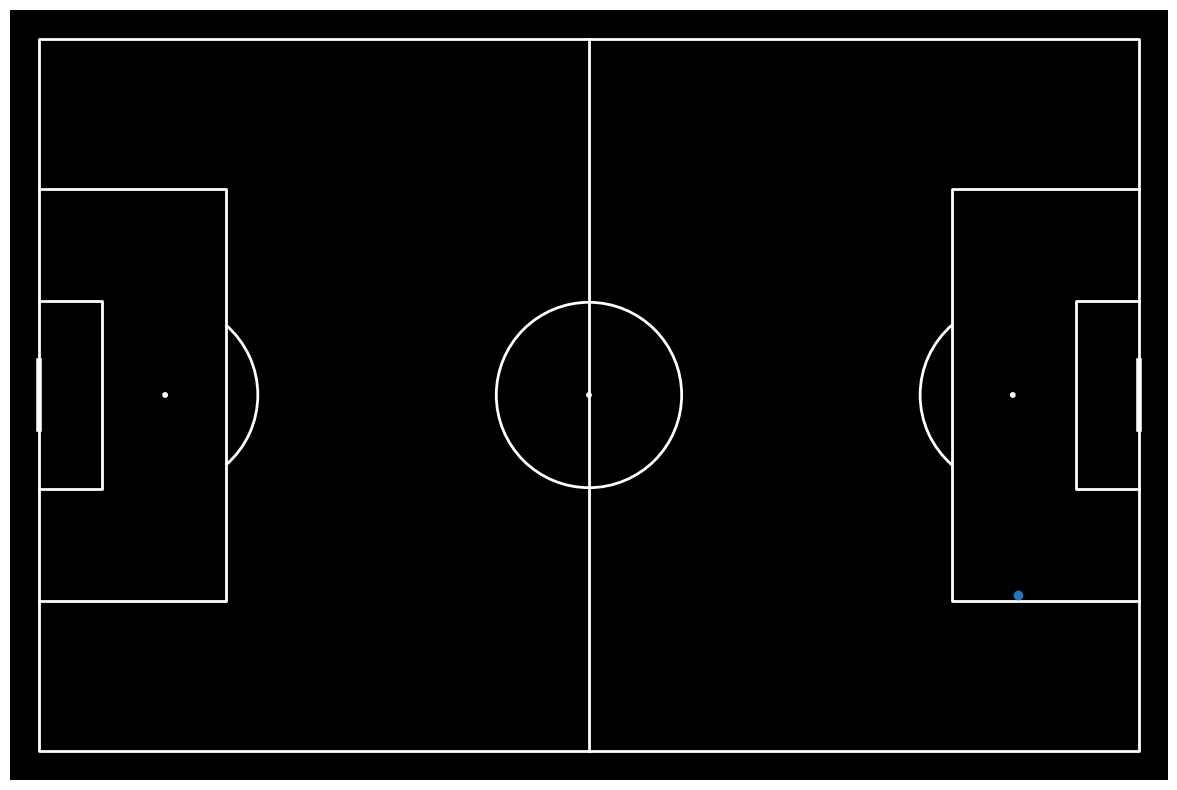

In [4]:
# Define the coordinates for the Voronoi diagram

fig, ax = plt.subplots(figsize=(18, 10))
pitch = Pitch(pitch_type='opta', pitch_color='black', line_color='white', pitch_length=120, pitch_width=80)
pitch.draw(ax=ax)
pitch.scatter(89,22,ax=ax)

In [5]:
# Preview the data to be used in the Voronoi diagram
df

,x,y,team
0,50.996644,80.501342,0.0
1,65.870270,35.310811,0.0
2,30.682051,69.264103,0.0
3,9.963889,50.033333,0.0
4,67.602410,83.973494,0.0
5,59.146296,68.911111,0.0
6,71.060870,57.991304,0.0
7,56.854286,49.362857,0.0
8,67.970115,16.450575,0.0
9,52.052041,42.621429,0.0


# Voronoi Diagram Generation

Generate and display the Voronoi diagram using the specified coordinates and visualization libraries.

In [6]:
# Stack coordinates for Voronoi diagram plotting
points=np.column_stack((df.x,df.y))

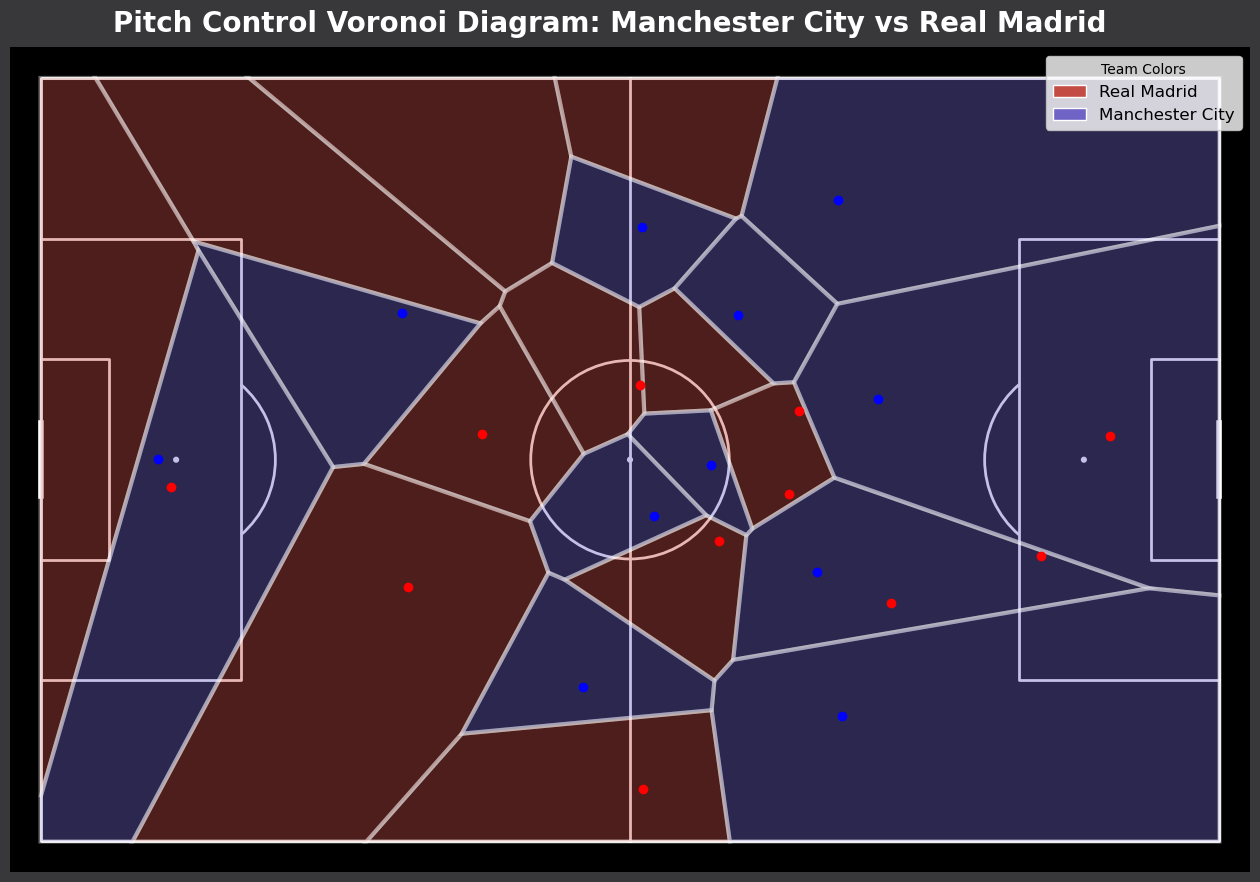

In [8]:
# Generate and plot the Voronoi diagram
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from mplsoccer import Pitch


fig, ax = plt.subplots(figsize=(16, 12))  # Swap the figsize for a vertical representation
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')


pitch = Pitch(pitch_type='opta', pitch_color='black', line_color='white', pitch_length=120, pitch_width=80)
pitch.draw(ax=ax)


x = df.x
y = df.y
team1, team2 = pitch.voronoi(x, y, df.team)

t1 = pitch.polygon(team1, ax=ax, fc='#c34c45', ec='white', lw=3, alpha=0.4)  # Red for Real Madrid
t2 = pitch.polygon(team2, ax=ax, fc='#6f63c5', ec='white', lw=3, alpha=0.4)  # Blue for Manchester City


for i in range(len(df['x'])):
    if df['team'][i] == 0:
        pitch.scatter(df['x'][i], df['y'][i], ax=ax, color='blue')  # Manchester City
    if df['team'][i] == 1:
        pitch.scatter(df['y'][i], df['x'][i], ax=ax, color='red')   # Real Madrid


legend_elements = [
    Patch(facecolor='#c34c45', edgecolor='white', label='Real Madrid'),
    Patch(facecolor='#6f63c5', edgecolor='white', label='Manchester City')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize='large', title="Team Colors")

plt.subplots_adjust(top=1.1)
fig.suptitle("Pitch Control Voronoi Diagram: Manchester City vs Real Madrid", fontsize=20,fontweight='bold',color='white')

plt.show()
